In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [2]:
class Model(nn.Module):
    def __init__(self, in_feats=4, h1=8, h2=8, out_feats=3) -> None:
        super().__init__()
        self.fc1 = nn.Linear(in_feats, h1)
        self.fc2 = nn.Linear(h1, h2)
        self.out = nn.Linear(h2, out_feats)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.out(x)
        return x

In [3]:
torch.manual_seed(41)
model = Model()

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
url = 'https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv'
df = pd.read_csv(url)

In [6]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [7]:
df['species'] = df['species'].replace({'setosa': 0.0, 'versicolor': 1.0, 'virginica': 2.0})
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [8]:
X = df.drop('species', axis=1).values
y = df['species'].values

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=41)

In [10]:
# make them float tensors becuase the values are floats
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
# make them long tensors becuase the values are ints
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [11]:
# create loss func to measure the error
criterion = nn.CrossEntropyLoss()
# choose Adam optimizer and set lr (if error doesn't go down after a number of epochs, lower our learning rates)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [12]:
# training
epochs = 100
losses = []
for i in range(epochs):
    # go froward to get a prediction
    y_pred = model.forward(X_train)
    # measure the loss/error
    loss = criterion(y_pred, y_train)
    # save losses
    losses.append(loss.detach().numpy())
    if i % 10 == 0:
        print(f'Epoch: {i} Loss: {loss}')
    # back propogation (take the error rate of forward propogation and send it back throug hthe network to tune the weights)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()


Epoch: 0 Loss: 1.1318050622940063
Epoch: 10 Loss: 0.9658582210540771
Epoch: 20 Loss: 0.6791527271270752
Epoch: 30 Loss: 0.40087205171585083
Epoch: 40 Loss: 0.22570069134235382
Epoch: 50 Loss: 0.12255843728780746
Epoch: 60 Loss: 0.07509137690067291
Epoch: 70 Loss: 0.05467576906085014
Epoch: 80 Loss: 0.04448388144373894
Epoch: 90 Loss: 0.038461677730083466


Text(0.5, 0, 'Epoch')

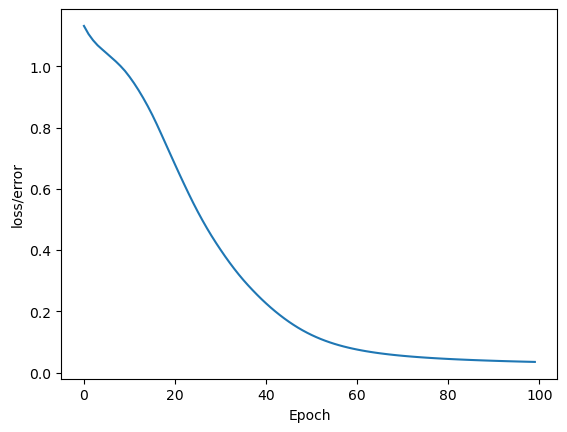

In [13]:
plt.plot(range(epochs), losses)
plt.ylabel("loss/error")
plt.xlabel('Epoch')

In [15]:
with torch.no_grad():
    y_eval = model.forward(X_test)
    loss = criterion(y_eval, y_test)
    print(loss)

tensor(0.1458)


In [21]:
correct = 0
with torch.no_grad():
    for i, data in enumerate(X_test):
        y_val = model.forward(data)
        # tells us what flower type the network predicted (highest number)
        print(f'{i+1}.) {str(y_val)} \t {"Correct" if y_val.argmax().item() == y_test[i] else "Incorrect"}')
        if y_val.argmax().item() == y_test[i]:
            correct += 1
    print(f'{correct} Correct!')

1.) tensor([-7.7132,  1.5807,  4.8588]) 	 Correct
2.) tensor([-10.2249,   0.5155,   8.7638]) 	 Correct
3.) tensor([-10.7185,   1.1882,   8.2269]) 	 Correct
4.) tensor([-4.4690,  3.5339, -1.1210]) 	 Correct
5.) tensor([-9.0873,  1.4669,  6.2793]) 	 Correct
6.) tensor([-2.2770,  3.7022, -4.1140]) 	 Correct
7.) tensor([-7.0673,  2.2028,  3.2917]) 	 Correct
8.) tensor([-4.2226,  3.6469, -1.5420]) 	 Correct
9.) tensor([-8.0634,  1.8251,  4.7820]) 	 Correct
10.) tensor([-10.8514,   0.5058,   9.3629]) 	 Correct
11.) tensor([-6.8611,  2.2126,  3.0811]) 	 Correct
12.) tensor([  9.4301,   3.2669, -18.8494]) 	 Correct
13.) tensor([  8.5966,   2.9338, -17.1305]) 	 Correct
14.) tensor([-1.0571,  3.1664, -4.7063]) 	 Correct
15.) tensor([  8.0257,   3.2468, -16.7651]) 	 Correct
16.) tensor([-6.7032,  2.4148,  2.6586]) 	 Correct
17.) tensor([  8.4607,   3.0915, -17.1118]) 	 Correct
18.) tensor([-7.5983,  1.7014,  4.5610]) 	 Incorrect
19.) tensor([  9.0443,   3.1470, -18.0944]) 	 Correct
20.) tensor([ 

In [22]:
new_iris = torch.tensor([4.7, 3.2, 1.3, 0.2])

In [23]:
with torch.no_grad():
    print(model(new_iris))

tensor([  9.2014,   3.0883, -18.2702])


In [25]:
# save NN
torch.save(model.state_dict(), 'iris_model.pt')

In [27]:
# load model
new_model = Model()
new_model.load_state_dict(torch.load('iris_model.pt'))

<All keys matched successfully>

In [28]:
new_model.eval()

Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=8, bias=True)
  (out): Linear(in_features=8, out_features=3, bias=True)
)